<a href="https://colab.research.google.com/github/kashavrandheer/COMPUTER-VISION/blob/main/Super_store_data_set_visulization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/Global_Superstore2.csv', encoding='latin1')
# Show first 5 rows
print(df.head())

   Row ID         Order ID  Order Date   Ship Date     Ship Mode Customer ID  \
0   32298   CA-2012-124891  31-07-2012  31-07-2012      Same Day    RH-19495   
1   26341    IN-2013-77878  05-02-2013  07-02-2013  Second Class    JR-16210   
2   25330    IN-2013-71249  17-10-2013  18-10-2013   First Class    CR-12730   
3   13524  ES-2013-1579342  28-01-2013  30-01-2013   First Class    KM-16375   
4   47221     SG-2013-4320  05-11-2013  06-11-2013      Same Day     RH-9495   

      Customer Name      Segment           City            State  ...  \
0       Rick Hansen     Consumer  New York City         New York  ...   
1     Justin Ritter    Corporate     Wollongong  New South Wales  ...   
2      Craig Reiter     Consumer       Brisbane       Queensland  ...   
3  Katherine Murray  Home Office         Berlin           Berlin  ...   
4       Rick Hansen     Consumer          Dakar            Dakar  ...   

         Product ID    Category Sub-Category  \
0   TEC-AC-10003033  Technology 

In [4]:
# Basic info
print(df.info())

# Summary statistics
print(df.describe())

# Check missing values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [5]:
# Total Sales and Profit
print("Total Sales:", df["Sales"].sum())
print("Total Profit:", df["Profit"].sum())

# Sales by Region
region_sales = df.groupby("Region")["Sales"].sum().sort_values(ascending=False)
print(region_sales)

# Sales by Category
category_sales = df.groupby("Category")["Sales"].sum().sort_values(ascending=False)
print(category_sales)


Total Sales: 12642501.909880001
Total Profit: 1467457.29128
Region
Central           2.822303e+06
South             1.600907e+06
North             1.248166e+06
Oceania           1.100185e+06
Southeast Asia    8.844232e+05
North Asia        8.483098e+05
EMEA              8.061613e+05
Africa            7.837732e+05
Central Asia      7.528266e+05
West              7.254578e+05
East              6.787812e+05
Caribbean         3.242809e+05
Canada            6.692817e+04
Name: Sales, dtype: float64
Category
Technology         4.744557e+06
Furniture          4.110874e+06
Office Supplies    3.787070e+06
Name: Sales, dtype: float64


In [9]:
# Total Sales vs Shipping Cost
total_sales = df["Sales"].sum()
total_shipping = df["Shipping Cost"].sum()

print("Total Sales:", total_sales)
print("Total Shipping Cost:", total_shipping)

# Correlation between Sales & Shipping Cost
correlation = df["Sales"].corr(df["Shipping Cost"])
print("Correlation between Sales and Shipping Cost:", correlation)

Total Sales: 12642501.909880001
Total Shipping Cost: 1352820.6899999997
Correlation between Sales and Shipping Cost: 0.7680728376889521


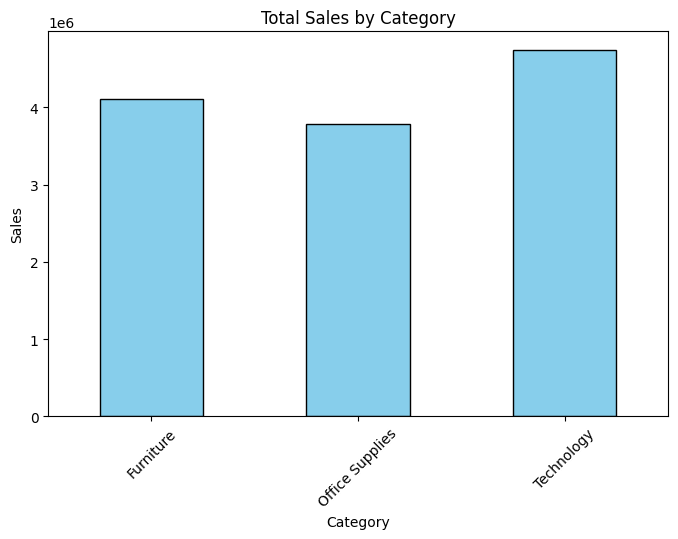

In [10]:
# Group data by Category and calculate total sales
category_sales = df.groupby("Category")["Sales"].sum()

# Plot bar graph
plt.figure(figsize=(8,5))
category_sales.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Total Sales by Category")
plt.xlabel("Category")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.show()


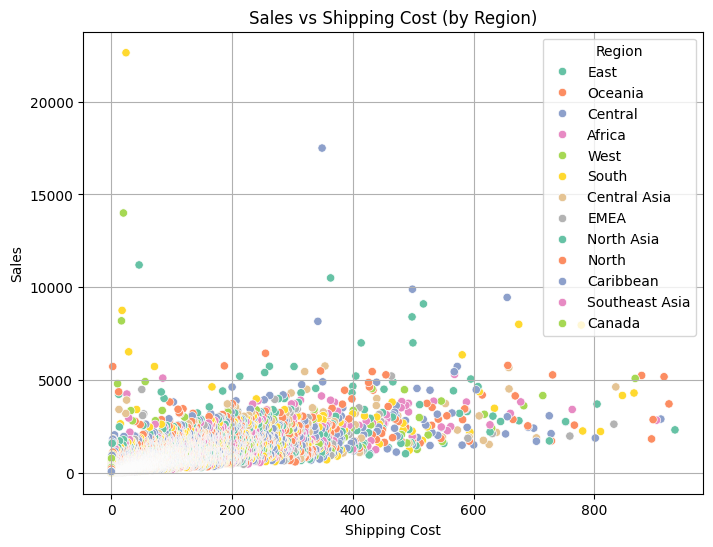

/tmp/ipython-input-1336240214.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Category", y="Shipping Cost", data=df, palette="coolwarm")


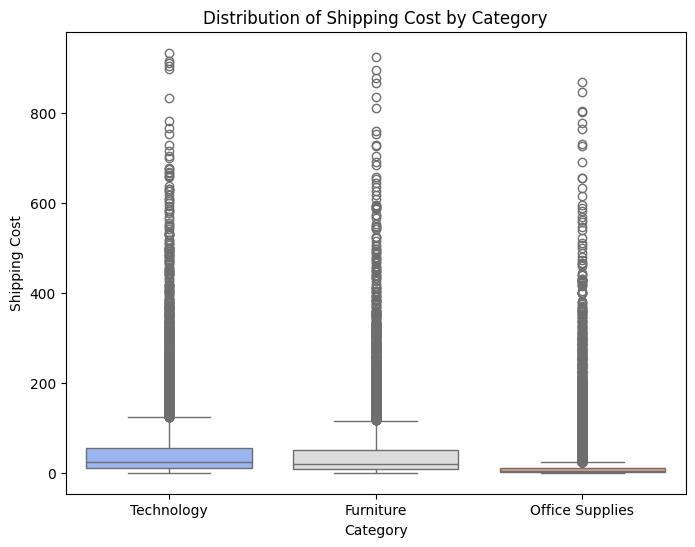

In [11]:
# Scatter plot: Sales vs Shipping Cost
plt.figure(figsize=(8,6))
sns.scatterplot(x="Shipping Cost", y="Sales", data=df, hue="Region", palette="Set2")
plt.title("Sales vs Shipping Cost (by Region)")
plt.xlabel("Shipping Cost")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

# Boxplot: Shipping cost by category
plt.figure(figsize=(8,6))
sns.boxplot(x="Category", y="Shipping Cost", data=df, palette="coolwarm")
plt.title("Distribution of Shipping Cost by Category")
plt.show()

/tmp/ipython-input-3838734368.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.index, y=region_sales.values, palette="viridis")


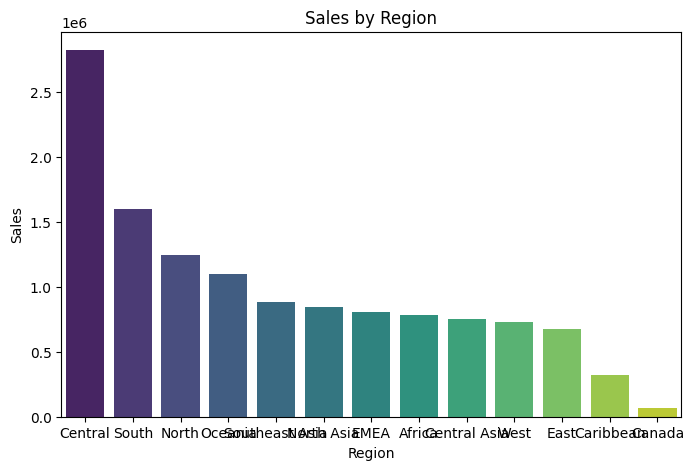

/tmp/ipython-input-3838734368.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette="mako")


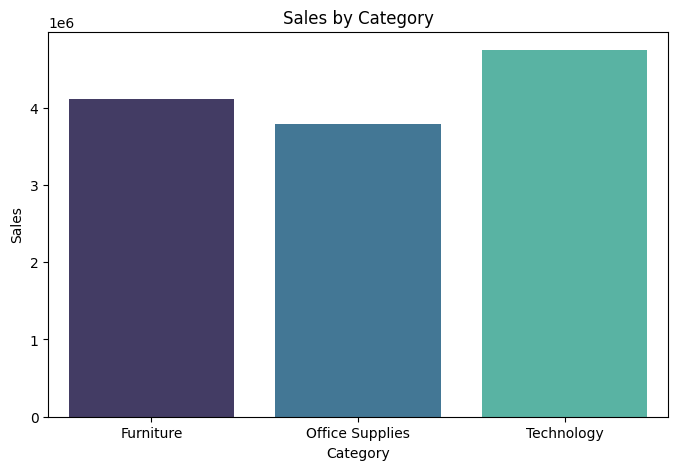

/tmp/ipython-input-3838734368.py:16: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Order Date"] = pd.to_datetime(df["Order Date"])


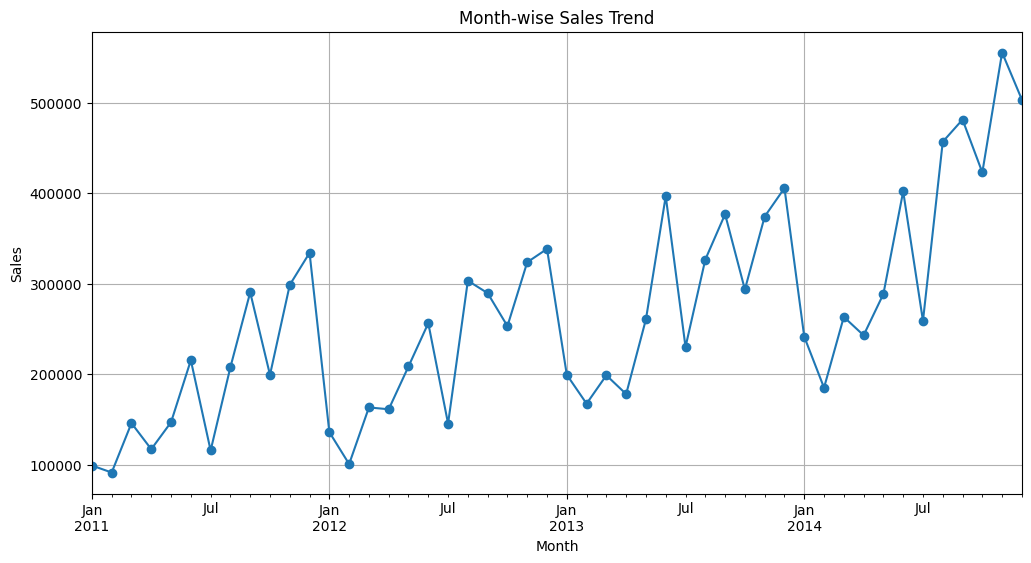

In [12]:
# Sales by Region (Bar Plot)
plt.figure(figsize=(8,5))
sns.barplot(x=region_sales.index, y=region_sales.values, palette="viridis")
plt.title("Sales by Region")
plt.ylabel("Sales")
plt.show()

# Sales by Category
plt.figure(figsize=(8,5))
sns.barplot(x=category_sales.index, y=category_sales.values, palette="mako")
plt.title("Sales by Category")
plt.ylabel("Sales")
plt.show()

# Month-wise Sales Trend
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Month"] = df["Order Date"].dt.to_period("M")

monthly_sales = df.groupby("Month")["Sales"].sum()

plt.figure(figsize=(12,6))
monthly_sales.plot(kind="line", marker="o")
plt.title("Month-wise Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.grid()
plt.show()


/tmp/ipython-input-654203899.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_products.index, x=top_products.values, palette="cubehelix")


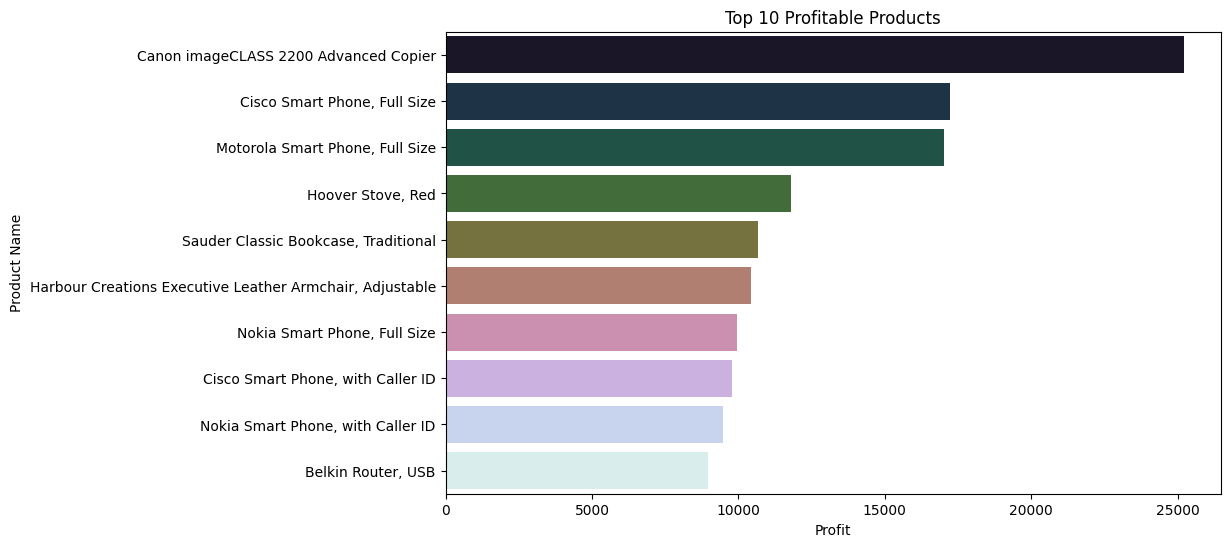

In [13]:
# Top 10 Products by Profit
top_products = df.groupby("Product Name")["Profit"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(y=top_products.index, x=top_products.values, palette="cubehelix")
plt.title("Top 10 Profitable Products")
plt.xlabel("Profit")
plt.show()
